# Convolution Neural Networks (CNN) - VGG16

###  Deep learning on images

Classify images into two categories(Ankur vs Priyanka) using VGG16 CNN model and Keras library. This explains one way of fine tuning the VGG16 model and Keras-CNN-VGG16-Fine-Tuned.ipynb defines another way to fine tune VGG16 model.

#### VGG16

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. It was submitted to Large Scale Visual Recognition Challenge 2014 (ILSVRC2014) and The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another.

https://arxiv.org/abs/1409.1556v6

The VGG() class takes a few arguments that may only interest you if you are looking to use the model in your own project, e.g. for transfer learning.

For example:
 - **include_top** (True): Whether or not to include the output layers for the model. You don’t need these if you are fitting the model on your own problem.
 - **weights** (‘imagenet‘): What weights to load. You can specify None to not load pre-trained weights if you are interested in training the model yourself from scratch.
 - **input_tensor** (None): A new input layer if you intend to fit the model on new data of a different size.
 - **input_shape** (None): The size of images that the model is expected to take if you change the input layer.
 - **pooling** (None): The type of pooling to use when you are training a new set of output layers.
 - **classes** (1000): The number of classes (e.g. size of output vector) for the model.
 
Next, let’s look at using the loaded VGG model to classify ad hoc photographs.

#### Data
You can prepare your own data of images or you can download the cat vs dog images from the kaggle website - 
https://www.kaggle.com/c/dogs-vs-cats/data

#### Reference:
https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html


### Importing libraries and splitting the dataset

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation, Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Model
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
# relative path to the train, test and validation data
train_path = 'data/train'
valid_path = 'data/valid'
test_path  = 'data/test'

In [3]:
# The input training images can be of any size and target_size parameter will resize the input images to 224x224
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['Ankur', 'Priyanka'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['Ankur', 'Priyanka'], batch_size=10)
test_batches  = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['Ankur', 'Priyanka'], batch_size=60)

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [4]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(24,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/home/agoel/anaconda3/envs/ML/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


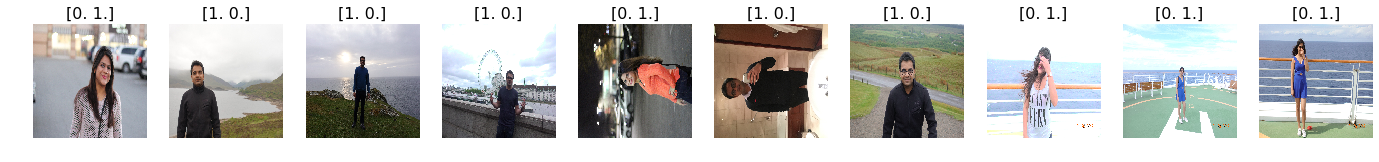

In [5]:
# Grab the batch of next images. In this case the batch_size is 10
imgs, labels = next(train_batches)
# Plot images from the training_set data
plots(imgs, titles=labels)

In [6]:
# Keras will download the VGG16 model to your system
vgg16_model = keras.applications.vgg16.VGG16()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# Summary of the VGG16 model. The output layer has 1000 nodes and is used to classify images into 1000
# different categories.
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
# VGG16 is not of type Sequential.
type(vgg16_model)

keras.engine.training.Model

In [9]:
# print the number of layers in the model
print(len(vgg16_model.layers))

23


In [10]:
# create a plot of the layers in the VGG model, as follows:
plot_model(vgg16_model, to_file='vgg16.png')

In [11]:
model_cnn = Sequential()
# parse through each of the layers of VGG16 model (except output layer) 
# and add each of them to our Sequential Model
for layer in vgg16_model.layers[:-1]:
    #print(layer)
    model_cnn.add(layer)

In [12]:
type(model_cnn)

keras.engine.sequential.Sequential

In [13]:
# print the number of layers in the model
print(len(model_cnn.layers))

21


In [14]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [15]:
# Take off the output dense layer with 1000 nodes.
# model_cnn.layers.pop()

In [16]:
# Freeze the layers and to "freeze" a layer means to exclude it from training, i.e. its weights will never be updated. 
# This is useful in the context of fine-tuning a model, or using fixed embeddings for a text input.
for layer in model_cnn.layers:
    layer.trainable = False

In [17]:
# Add an output Dense layer with 2 nodes as we want to categorize our images into 2 categories (Ankur vs Priyanka)
model_cnn.add(Dense(2, activation='softmax'))

In [18]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [19]:
model_cnn.compile(loss='categorical_crossentropy', 
                  optimizer='rmsprop', 
                  metrics = ['accuracy'])

### Training the Fine tuned VGG16 model

In [20]:
# By default, shuffle is True and it tells that the order of data your model is 
# iterating with each run/epoch will be different.
model_cnn.fit_generator(train_batches, steps_per_epoch=10,
                    validation_data=valid_batches, validation_steps=3, epochs=7, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/7
 - 57s - loss: 1.0017 - acc: 0.7200 - val_loss: 1.8135 - val_acc: 0.6000
Epoch 2/7
 - 37s - loss: 0.2501 - acc: 0.9100 - val_loss: 1.1921 - val_acc: 0.6333
Epoch 3/7
 - 38s - loss: 0.0744 - acc: 0.9600 - val_loss: 1.3150 - val_acc: 0.6667
Epoch 4/7
 - 37s - loss: 0.0475 - acc: 0.9800 - val_loss: 1.1936 - val_acc: 0.7000
Epoch 5/7
 - 39s - loss: 0.0175 - acc: 1.0000 - val_loss: 1.1641 - val_acc: 0.6667
Epoch 6/7
 - 39s - loss: 0.0098 - acc: 1.0000 - val_loss: 1.2699 - val_acc: 0.6667
Epoch 7/7
 - 38s - loss: 0.0059 - acc: 1.0000 - val_loss: 1.2082 - val_acc: 0.6667


### Save Model

In [22]:
model_cnn.save('VGG16_AP1.h5')

In [23]:
model_cnn.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

## Predict using fined tune VGG16 model

In [24]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

/home/agoel/anaconda3/envs/ML/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


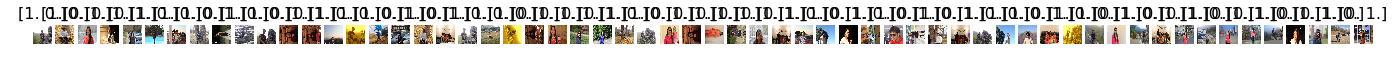

In [25]:
# Ankur's images are labeled as (1,0) and Priyanka's images are labeled as (0,1)
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [26]:
# Ankur's images will be labeled as 1 instead of (1,0) 
# and Priyanka's imges will be labeled as 0 instead of (0,1)
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0.], dtype=float32)

In [27]:
# predictions = model.predict(train_batches, batch_size=10, verbose=0)

# If there are 72 test images in total and the batch_size is 10 then steps = 72/10 = 7.2
# Alternatively, if there are 60 test images and the batch_size is 10 then steps=1
predictions = model_cnn.predict_generator(test_batches, steps=1, verbose=0)

In [28]:
predictions

array([[9.3130636e-01, 6.8693601e-02],
       [8.9489549e-01, 1.0510448e-01],
       [1.4676246e-01, 8.5323751e-01],
       [9.4966418e-01, 5.0335757e-02],
       [4.4027871e-01, 5.5972129e-01],
       [2.2843133e-03, 9.9771571e-01],
       [8.8841981e-01, 1.1158024e-01],
       [9.7559486e-03, 9.9024409e-01],
       [9.9915469e-01, 8.4528927e-04],
       [8.8484049e-01, 1.1515957e-01],
       [5.8374666e-03, 9.9416250e-01],
       [9.9027705e-01, 9.7230254e-03],
       [7.4063742e-01, 2.5936258e-01],
       [6.7451900e-01, 3.2548097e-01],
       [3.8263980e-02, 9.6173602e-01],
       [9.8079211e-01, 1.9207902e-02],
       [1.3526129e-02, 9.8647392e-01],
       [9.9367952e-01, 6.3204709e-03],
       [1.1035511e-03, 9.9889648e-01],
       [8.2078367e-01, 1.7921628e-01],
       [7.8504717e-01, 2.1495287e-01],
       [3.7922423e-02, 9.6207756e-01],
       [9.9412835e-01, 5.8717206e-03],
       [9.9967766e-01, 3.2240056e-04],
       [1.0624848e-04, 9.9989378e-01],
       [9.9919325e-01, 8.

## Confusion Matrix
    

In [29]:
from sklearn.metrics import confusion_matrix
import itertools

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment = 'center',
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[11 19]
 [ 8 22]]


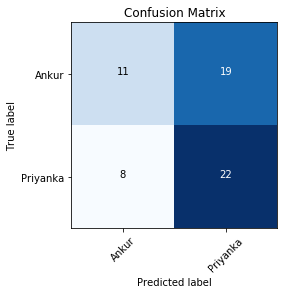

In [32]:
cm_plots_labels = ['Ankur', 'Priyanka']
plot_confusion_matrix(cm, cm_plots_labels, title='Confusion Matrix')